# Data Science
# Exercise 1 (Part 1/2: Small Data Set)
<br/>se21m024
<br/>Thomas Stummer
<br/>Small Dataset: Heart Disease (this notebook)
<br/>Big Dataset: Census Income (other notebook)
<br/><br/>
*The interpretation of the diagramms is printed directly obove the diagrams under the headline "Interpretation".*
<br/><br/>
Data taken from:
<br/>https://archive.ics.uci.edu/ml/datasets/Heart+Disease
<br/><br/>
Data Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. MediMcal Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# Import necessary dependencies

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import math as math
import itertools as it

pd.options.display.max_columns = None

%matplotlib inline

# Load and merge datasets

In [122]:
# Only examine processed data with a subset of 14 attributes

columns = [
    'Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Serum Cholestoral', 
    'Increased Blood Sugar', 'Electrocardiographic', 'Peak Heart Rate', 'Angina', 
    'ST depression', 'Peak Exercise ST Segment', 'Major Vessels', 'Thal', 'Diagnosis']

cleveland_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names = columns, skipinitialspace=True)
hungarian_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names = columns, skipinitialspace=True)
switzerland_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', sep=',', names = columns, skipinitialspace=True)
va_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', sep=',', names = columns, skipinitialspace=True)

raw_data = pd.concat([cleveland_raw_data, hungarian_raw_data, switzerland_raw_data, va_raw_data])

# re-shuffle records just to randomize data points
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)
raw_data.head()


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Increased Blood Sugar,Electrocardiographic,Peak Heart Rate,Angina,ST depression,Peak Exercise ST Segment,Major Vessels,Thal,Diagnosis
0,36.0,1.0,2.0,120,166,0,0,180,0,0.0,?,?,?,0
1,45.0,1.0,2.0,140,224,1,0,122,0,0.0,?,?,?,0
2,48.0,1.0,4.0,160,329,0,0,92,1,1.5,2,?,?,1
3,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
4,40.0,0.0,4.0,150,392,0,0,130,0,2.0,2,?,6,1


# Show dataset features and values

In [123]:
data=raw_data

### Helper functions

def roundElementToIntSafe(y):
    try:
        return int(float(y))
    except:
        return None

def roundToInt(x):
    return x.apply(lambda value: roundElementToIntSafe(value))

def parseFloatElementSafe(y):
    try:
        return float(y)
    except:
        return None

def parseFloat(x):
    return x.apply(lambda value: parseFloatElementSafe(value)) 


### Parse columns, assign categories, remove invalid records

numericalColumns = []
categoryColumns = []
numericalCategoryColumns = []

def processColumn(data, column, isFloat=False, categoryMapping=None, categories=None):

    # Parse
    if not isFloat:
        data[column] = roundToInt(data[column])
    else:
        data[column] = parseFloat(data[column])

    # (optional) Filter records that contain one or more invalid columns
    #data = data.drop(data[data[column].isnull()].index)

    # Append to global array
    if categoryMapping is None:
        numericalColumns.append(column)
    else:
        numericalCategoryColumns.append(column)
        categoryColumn = column
        categoryColumns.append(categoryColumn)
        data[categoryColumn] = data[column].apply(categoryMapping)
    	
        # (optional) Filter records that contain one or more invalid columns
        #data = data.drop(data[data[categoryColumn].isnull()].index)

        # Add category
        data[categoryColumn] = pd.Categorical(data[categoryColumn], categories=categories)

    return data

# Age
processColumn(data=data, column='Age')

# Sex
data = processColumn(data=data, column='Sex',
categoryMapping=(lambda value: 'male' if value == 1 else 'female' if value == 0 else None), 
categories=['male', 'female'])

# Chest Pain Type
data = processColumn(data=data, column='Chest Pain Type',
categoryMapping=(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value == 2 else 'non-anginal pain' if value == 3 else 'asymptomatic' if value == 4 else None), 
categories=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])

#  Resting Blood Pressure [mm Hg] (in mm Hg on admission to the hospital) 
data = processColumn(data=data, column='Resting Blood Pressure')

# Serum Cholestoral in mg/dl 
data = processColumn(data=data, column='Serum Cholestoral')
# Fix Serum Cholestoral = 0
data['Serum Cholestoral'] = data['Serum Cholestoral'].apply(lambda value: value if value > 0 else None)

# Fasting Blood Sugar > 120 mg/dl
data = processColumn(data=data, column='Increased Blood Sugar',
categoryMapping=(lambda value: 'True' if value == 1 else 'False' if value == 0 else None), 
categories=['True', 'False'])

# Resting Electrocardiographic Results
data = processColumn(data=data, column='Electrocardiographic',
categoryMapping=(lambda value: 'normal' if value == 0 else 'abnormality' if value == 1 else 'hypertrophy' if value == 2 else None),
categories=['normal', 'abnormality', 'hypertrophy'])

# Maximum Heart Rate achieved 
data = processColumn(data=data, column='Peak Heart Rate')

# Exercise induced Angina
data = processColumn(data=data, column='Angina',
categoryMapping=(lambda value: 'Yes' if value == 1 else 'No' if value == 0 else None),
categories=['Yes', 'No'])

# ST depression induced by exercise relative to rest 
data = processColumn(data=data, column='ST depression', isFloat=True)

# Slope of the peak exercise ST segment
data = processColumn(data=data, column='Peak Exercise ST Segment',
categoryMapping=(lambda value: 'upsloping' if value == 1 else 'flat' if value == 2 else 'downsloping' if value == 3 else None), 
categories=['upsloping', 'flat', 'downsloping'])

# Number of major vessels (0-3) colored by flourosopy
data = processColumn(data=data, column='Major Vessels')

# Thal
data = processColumn(data=data, column='Thal',
categoryMapping=(lambda value: 'normal' if value == 3 else 'fixed defect' if value == 6 else 'reversable defect' if value == 7 else None),
categories=['normal', 'fixed defect', 'reversable defect'])

# Diagnosis of heart disease (angiographic disease status)
data = processColumn(data=data, column='Diagnosis',
categoryMapping=(lambda value: '< 50% diameter narrowing' if value == 0 else '> 50% diameter narrowing' if value == 1 else None), 
categories=['< 50% diameter narrowing', '> 50% diameter narrowing'])

data.head()



,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Increased Blood Sugar,Electrocardiographic,Peak Heart Rate,Angina,ST depression,Peak Exercise ST Segment,Major Vessels,Thal,Diagnosis
0,36,male,atypical angina,120.0,166.0,False,normal,180.0,No,0.0,NaN,NaN,NaN,< 50% diameter narrowing
1,45,male,atypical angina,140.0,224.0,True,normal,122.0,No,0.0,NaN,NaN,NaN,< 50% diameter narrowing
2,48,male,asymptomatic,160.0,329.0,False,normal,92.0,Yes,1.5,flat,NaN,NaN,> 50% diameter narrowing
3,59,male,asymptomatic,164.0,176.0,True,hypertrophy,90.0,No,1.0,flat,2.0,fixed defect,NaN
4,40,female,asymptomatic,150.0,392.0,False,normal,130.0,No,2.0,flat,NaN,fixed defect,> 50% diameter narrowing


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [124]:
negativeDiagnosis = round(data[data['Diagnosis'] == '< 50% diameter narrowing'][numericalColumns].describe(),2)
positiveDiagnosis = round(data[data['Diagnosis'] == '> 50% diameter narrowing'][numericalColumns].describe(),2)
pd.concat([negativeDiagnosis, positiveDiagnosis], axis=1, keys=['< 50% diameter narrowing', '> 50% diameter narrowing'])

< 50% diameter narrowing                                           \
                           Age Resting Blood Pressure Serum Cholestoral   
count                   411.00                 391.00            372.00   
mean                     50.55                 129.91            240.16   
std                       9.43                  16.87             55.77   
min                      28.00                  80.00             85.00   
25%                      43.00                 120.00            204.00   
50%                      51.00                 130.00            233.00   
75%                      57.00                 140.00            270.25   
max                      76.00                 190.00            564.00   

                                                  > 50% diameter narrowing  \
      Peak Heart Rate ST depression Major Vessels                      Age   
count          391.00        390.00        165.00                   265.00   
mean           148.80          0.42          0.28                    53.53   
std             23.61          0.72          0.64                     8.74   
min             69.00         -1.10          0.00                    31.00   
25%            134.50          0.00          0.00                    48.00   
50%            151.00          0.00          0.00                    55.00   
75%            167.50          0.80          0.00                    59.00   
max            202.00          4.20          3.00                    75.00   

                                                                              \
      Resting Blood Pressure Serum Cholestoral Peak Heart Rate ST depression   
count                 252.00            196.00          252.00        250.00   
mean                  132.86            257.02          131.04          1.00   
std                    19.85             66.07           23.40          1.04   
min                    92.00            100.00           72.00         -2.60   
25%                   120.00            216.00          115.00          0.00   
50%                   130.00            248.00          130.00          1.00   
75%                   145.00            283.25          150.00          1.80   
max                   200.00            603.00          195.00          5.00   

                     
      Major Vessels  
count         58.00  
mean           0.74  
std            0.87  
min            0.00  
25%            0.00  
50%            1.00  
75%            1.00  
max            3.00

# Univariate Analysis

## Visualizing one dimension

### Distribution overview for numeric features

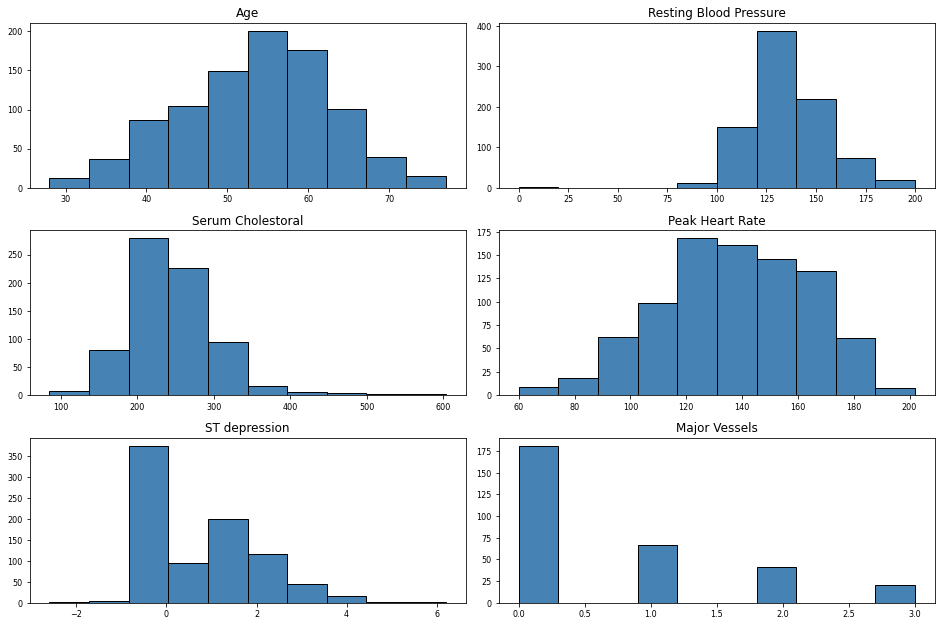

In [125]:
data.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2))   


### Distribution overview for categorical features

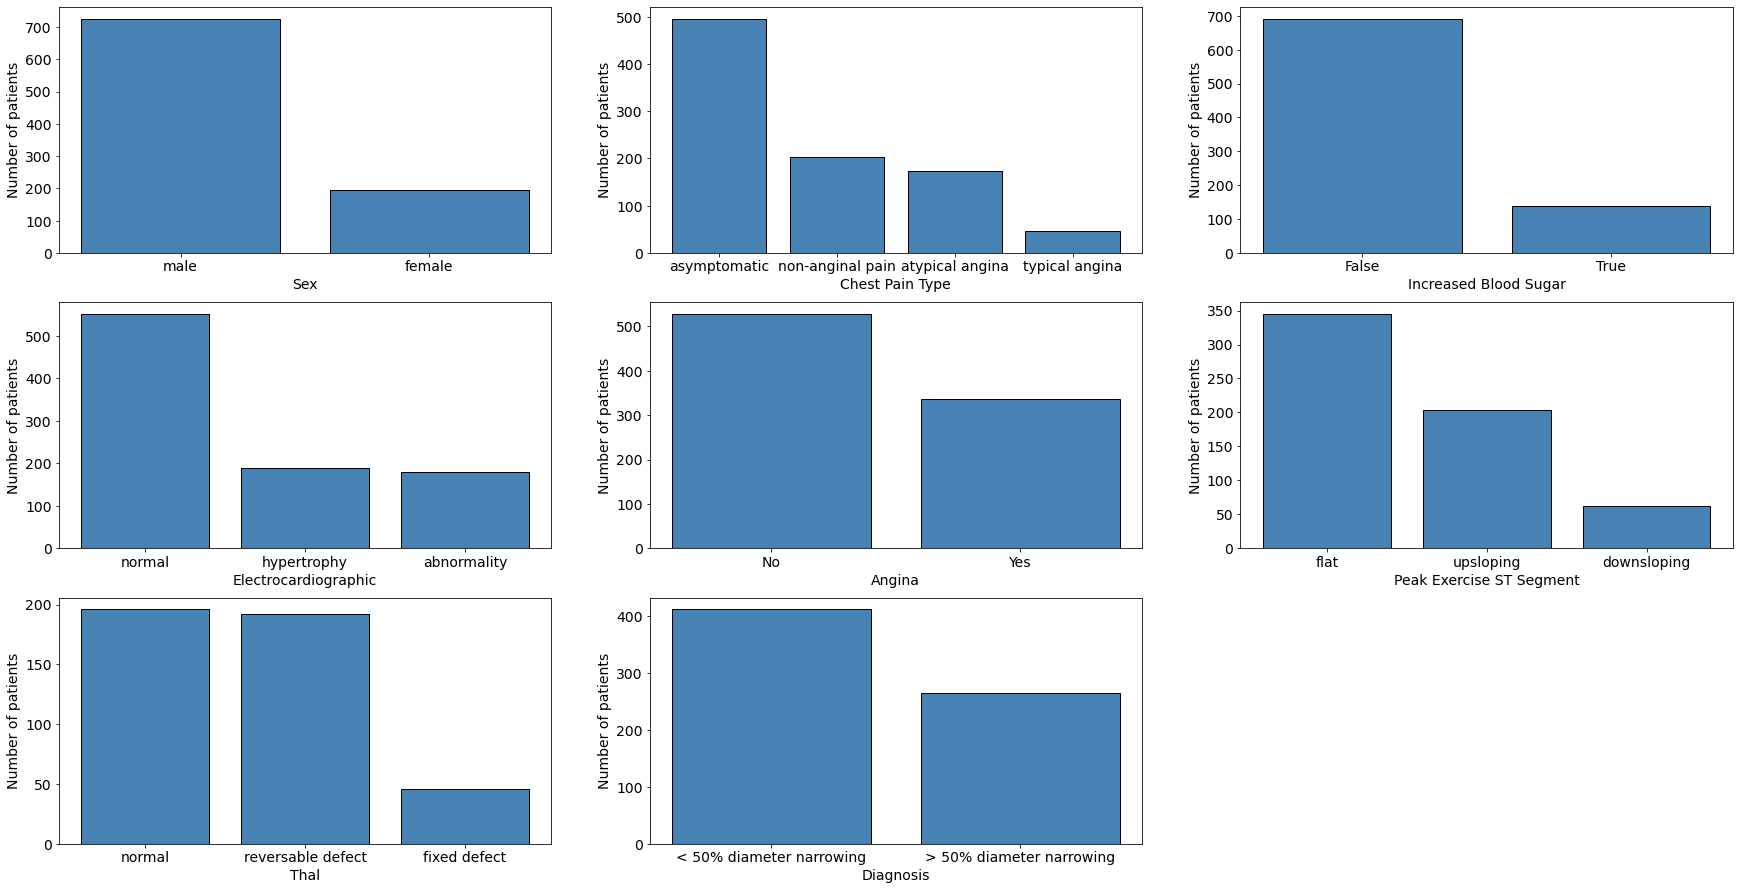

In [126]:
def printFigure(column, idx):
        ax = fig.add_subplot(3, 3, idx)
        ax.set_xlabel(column, size=14)
        ax.set_ylabel("Number of patients", size=14) 
        w_q = data[column].value_counts()
        w_q = (list(w_q.index), list(w_q.values))
        ax.tick_params(axis='both', which='major', labelsize=14)
        bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
                edgecolor='black', linewidth=1)

fig = plt.figure(figsize = (30, 15))
fig.subplots_adjust(top=0.9, wspace=0.2)

idx=1
for column in categoryColumns:
        printFigure(column, idx)
        idx+=1


# Multivariate Analysis

## Visualizing two dimensions

### Numerical Feature Correlation

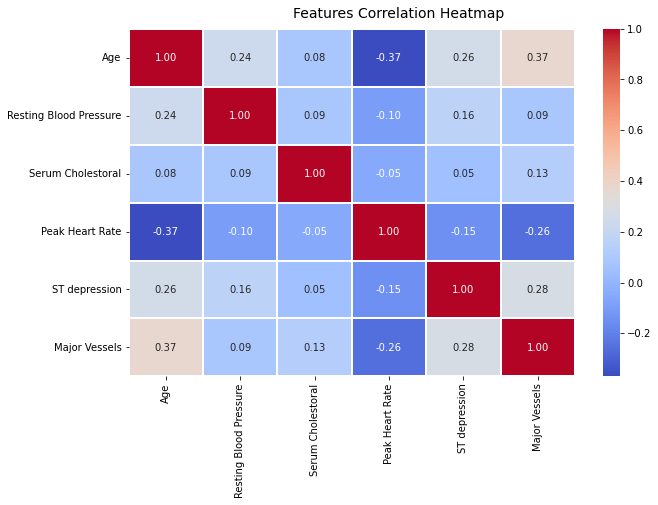

In [127]:
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=14)

Interpretation:
  In the heatmap as well as in the pairwise plots, a correlation between Age and Peak Heart Rate is observed.


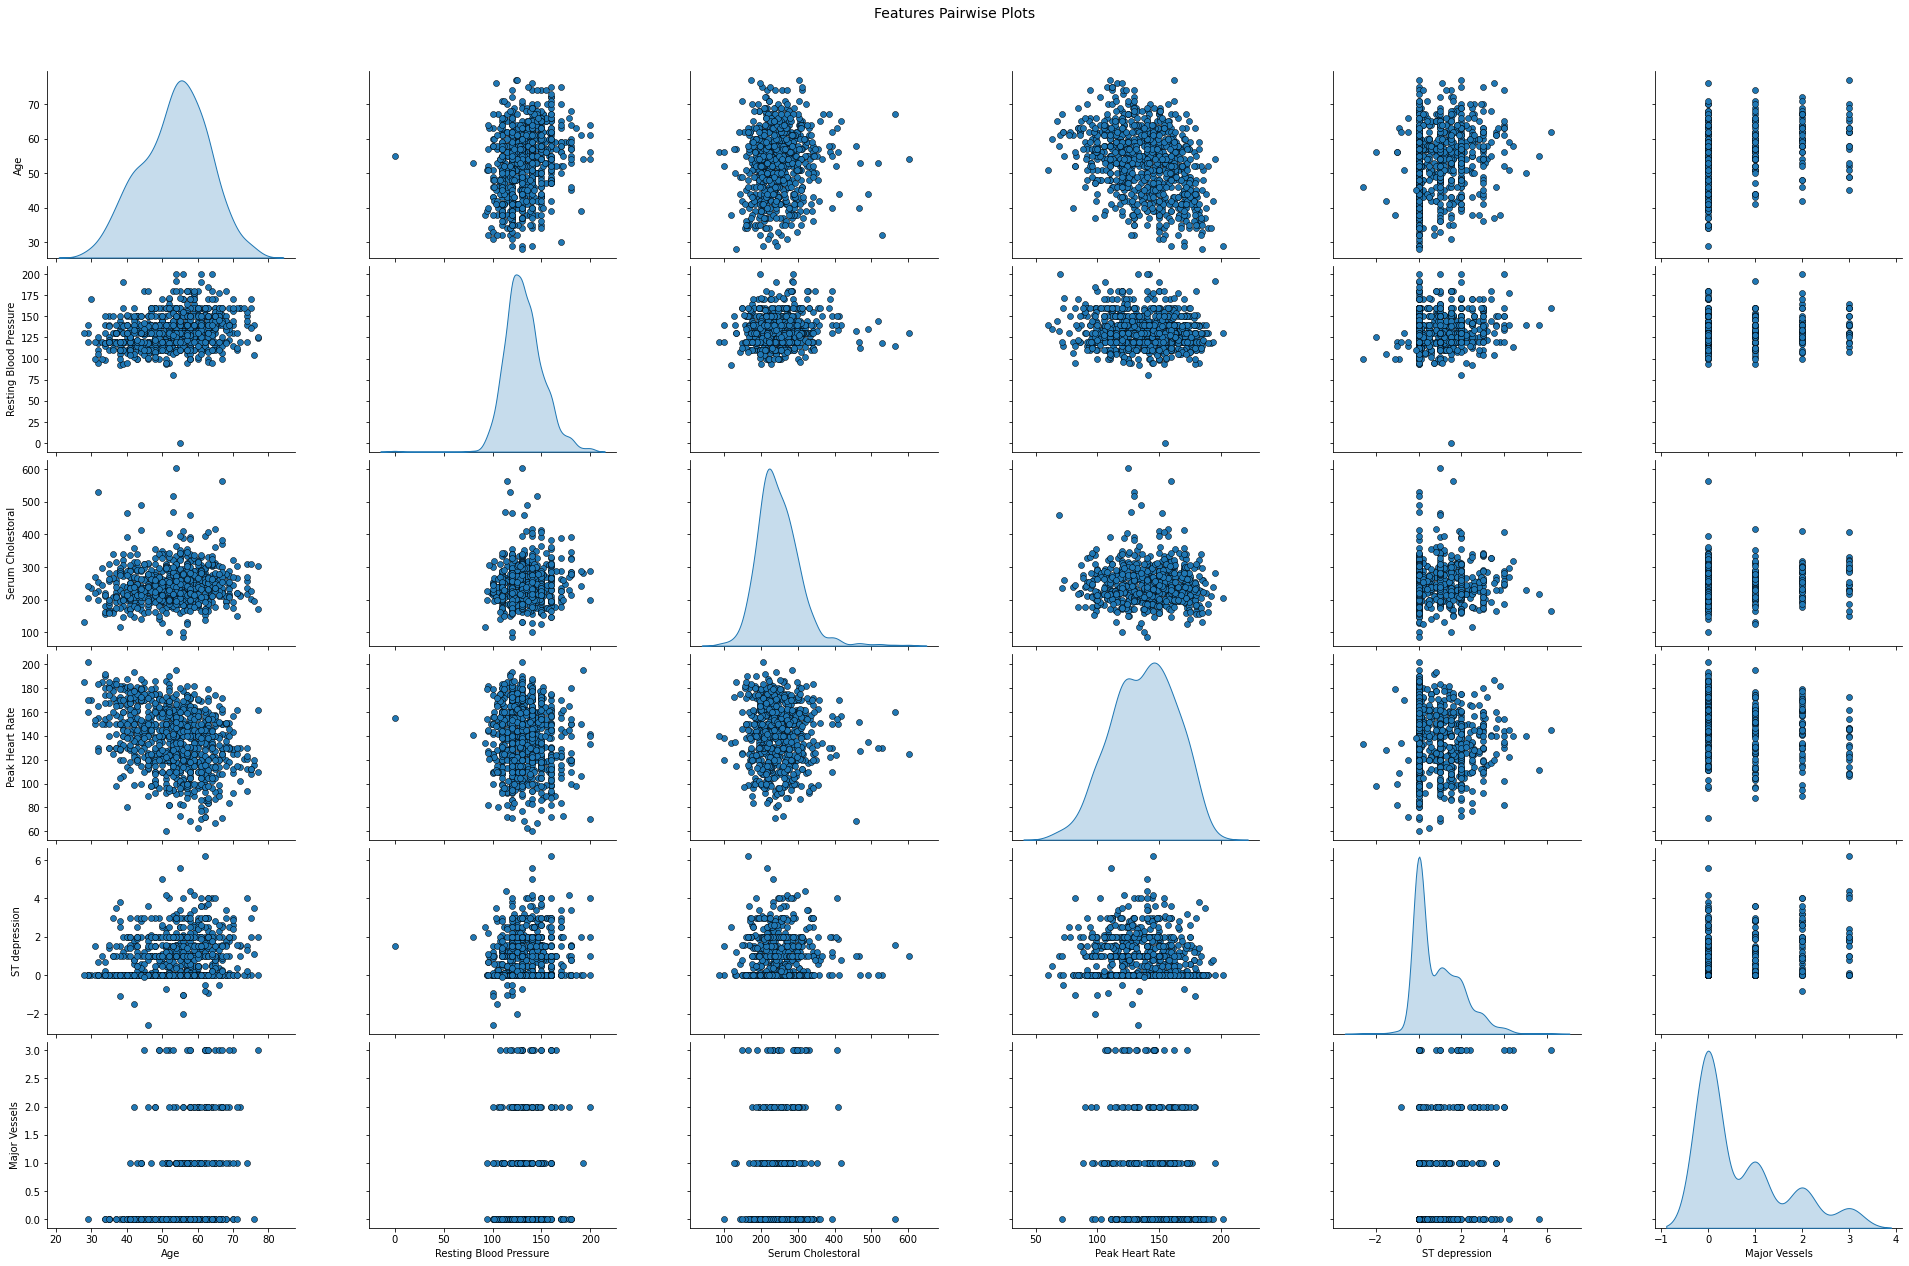

In [128]:
cols = numericalColumns
pp = sns.pairplot(data[cols], height=3.0, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Features Pairwise Plots', fontsize=14)

print("Interpretation:")
print("  In the heatmap as well as in the pairwise plots, a correlation between Age and Peak Heart Rate is observed.")


### Detailed Peak Heart Rate based on age

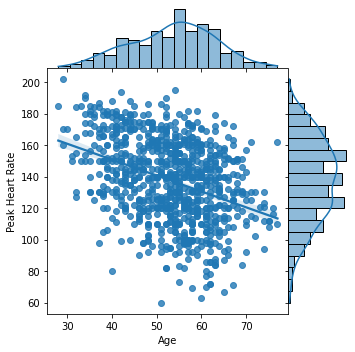

In [129]:
jp = sns.jointplot(x='Age', y='Peak Heart Rate', data=data,
              kind='reg', space=0, height=5, ratio=4)


### Diagnosis based on Categorical Features

Interpretation:
  The probability to get high narrowing is higher for males than females.
  The probability to get high narrowing is highest for patients with asymptomatic chest pain.
  The probability to get high narrowing is higher for patients with increased blood sugar.
  The probability to get high narrowing is higher for patients with exercise induced angina.
  The probability to get high narrowing is highest for patients with flat peak exercise ST segment followed by those with a downsloping segement.
  The probability to get high narrowing is highest for patients with reversable defect Thal followed by those with a fixed defect Thal.


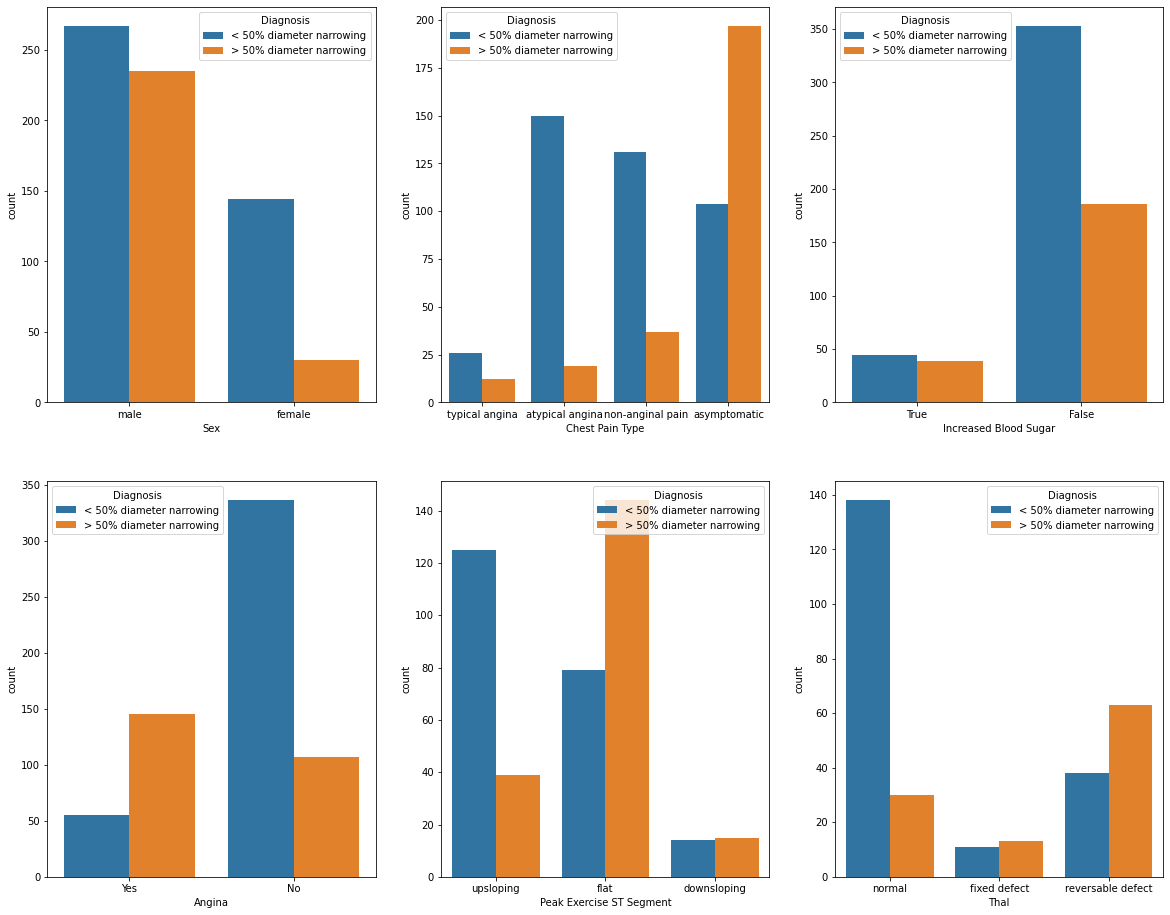

In [130]:

def printFigure(category_a, category_b, ax_idx):
    sns.countplot(x=category_a, hue=category_b, data=data, ax=ax_idx)

combinations = [
    ['Sex', 'Diagnosis'],
    ['Chest Pain Type', 'Diagnosis'],
    ['Increased Blood Sugar', 'Diagnosis'],
    ['Angina', 'Diagnosis'],
    ['Peak Exercise ST Segment', 'Diagnosis'],
    ['Thal', 'Diagnosis']
]

num_combinations = len(combinations)

num_rows = 2

fig, ax =plt.subplots(num_rows, 3, figsize=(20, 8*num_rows))

idx_a=0
idx_b=0

for cat_a, cat_b in combinations:
    if cat_a == cat_b:
        continue

    printFigure(cat_a, cat_b, ax[idx_b, idx_a%3])
    idx_a+=1
    if idx_a %3 ==0:
        idx_b+=1

print("Interpretation:")
print("  The probability to get high narrowing is higher for males than females.")
print("  The probability to get high narrowing is highest for patients with asymptomatic chest pain.")
print("  The probability to get high narrowing is higher for patients with increased blood sugar.")
print("  The probability to get high narrowing is higher for patients with exercise induced angina.")
print("  The probability to get high narrowing is highest for patients with flat peak exercise ST segment followed by those with a downsloping segement.")
print("  The probability to get high narrowing is highest for patients with reversable defect Thal followed by those with a fixed defect Thal.")

### Age Distribution based on Diagnosis

Interpretation:
  The mean age of patients with a diagnosis of > 50% narrowing is about 3 years higher than those with a diagnosis of < 50% narrowing.
  Patients with a diagnosis of < 50% narrowing vary greater in age.


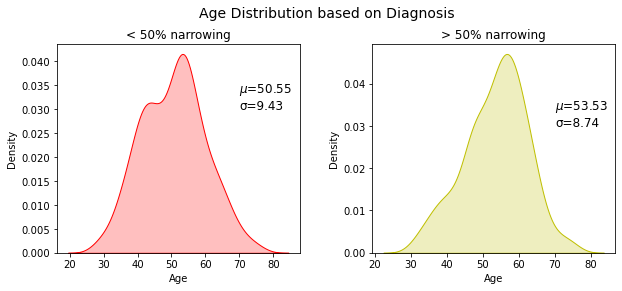

In [131]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Age Distribution based on Diagnosis", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'Age'

subData = data[data['Diagnosis'] == '< 50% diameter narrowing']
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("< 50% narrowing")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(70, 0.03, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data['Diagnosis'] == '> 50% diameter narrowing']
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("> 50% narrowing")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(70, 0.03, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  The mean age of patients with a diagnosis of > 50% narrowing is about 3 years higher than those with a diagnosis of < 50% narrowing.")
print("  Patients with a diagnosis of < 50% narrowing vary greater in age.")

### Resting Blood Pressure based on Diagnosis

Interpretation:
  Patients with a diagnosis of > 50% narrowing have a higher mean Resting Blood Pressure but also a higher standard deviation.


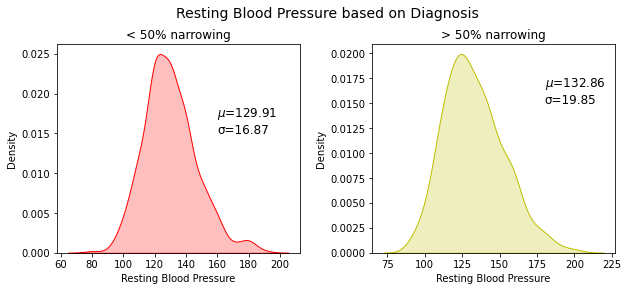

In [132]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Resting Blood Pressure based on Diagnosis", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'Resting Blood Pressure'

subData = data[data['Diagnosis'] == '< 50% diameter narrowing']
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("< 50% narrowing")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(160, 0.015, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data['Diagnosis'] == '> 50% diameter narrowing']
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("> 50% narrowing")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(180, 0.015, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  Patients with a diagnosis of > 50% narrowing have a higher mean Resting Blood Pressure but also a higher standard deviation.")

### Serum Cholestoralestoral based on Diagnosis

Interpretation:
  Patients with a diagnosis of > 50% narrowing have a higher mean Serum Cholestoral but also a higher standard deviation.


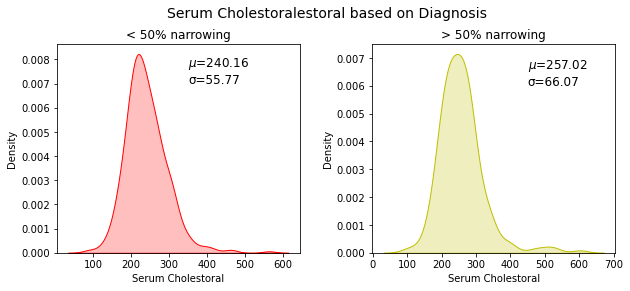

In [133]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Serum Cholestoralestoral based on Diagnosis", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'Serum Cholestoral'

subData = data[data['Diagnosis'] == '< 50% diameter narrowing']
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("< 50% narrowing")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(350, 0.007, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data['Diagnosis'] == '> 50% diameter narrowing']
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("> 50% narrowing")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(450, 0.006, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  Patients with a diagnosis of > 50% narrowing have a higher mean Serum Cholestoral but also a higher standard deviation.")

## Visualizing three dimensions

### Diagnosis based on Sex and Thal

Interpretation:
  For reversable defect thal, the sex of the patients has no significant impact.


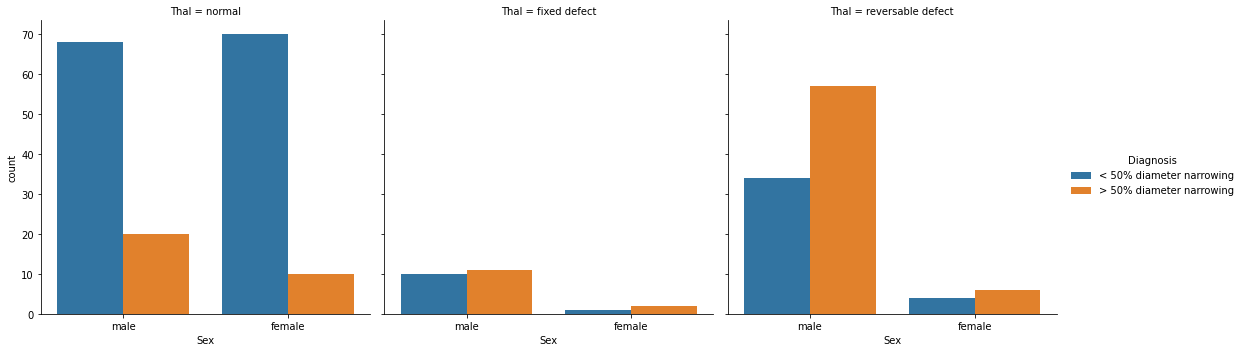

In [134]:
fc = sns.catplot(x="Sex", hue="Diagnosis", col="Thal", data=data, kind="count")

print("Interpretation:")
print("  For reversable defect thal, the sex of the patients has no significant impact.")